In [274]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
# pip install mglearn 실행해야 함.
import mglearn

%matplotlib inline

# 한글출력
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['image.cmap']="gray"

plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=4, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

## 비지도 학습과 데이터 전처리
비지도학습이란 알고있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 말함

### 3.1 비지도 학습의 종류
이번 장에서는 비지도 학습을 살펴보자. 바로 데이터의 비지도 변환<sup>unsupervised transformation</sup>과 군집<sup>clustering</sup>이다.

**비지도 변환**은 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터를 보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원축소<sup>dimensionality reduction</sup>
- 차원축속의 대표적인 예는  시각화를 위해 데이터셋을 2차원으로 변경하는 경우
- 또한, 데이터를 구성하는 단위나 성분을 찾기도 한다(많은 텍스트 문서에서 주제를 추출하는 것->이 때의 처리 작업은 많은 문서에서 주제를 찾는 것)


**군집 알고리즘**은 데이터를 비슷한 것끼리 그룹으로 묶는 것
- 소셜미디어 사이트에 업로드한 사진을 같은 그룹으로 묶어서 분류
- 비슷한 얼굴을 그룹 짓는 것



### 3.2 비지도 학습의 도전 과제


### 3.3 데이터 전처리와 스케일 조정
- SVM은 데이터의 스케일에 매우 민감하므로 보통은 알고리즘에 맞게 데이터의 특성값을 조정함
- **보통은 특성마다 스케일을 조정해서 데이터를 변경함**

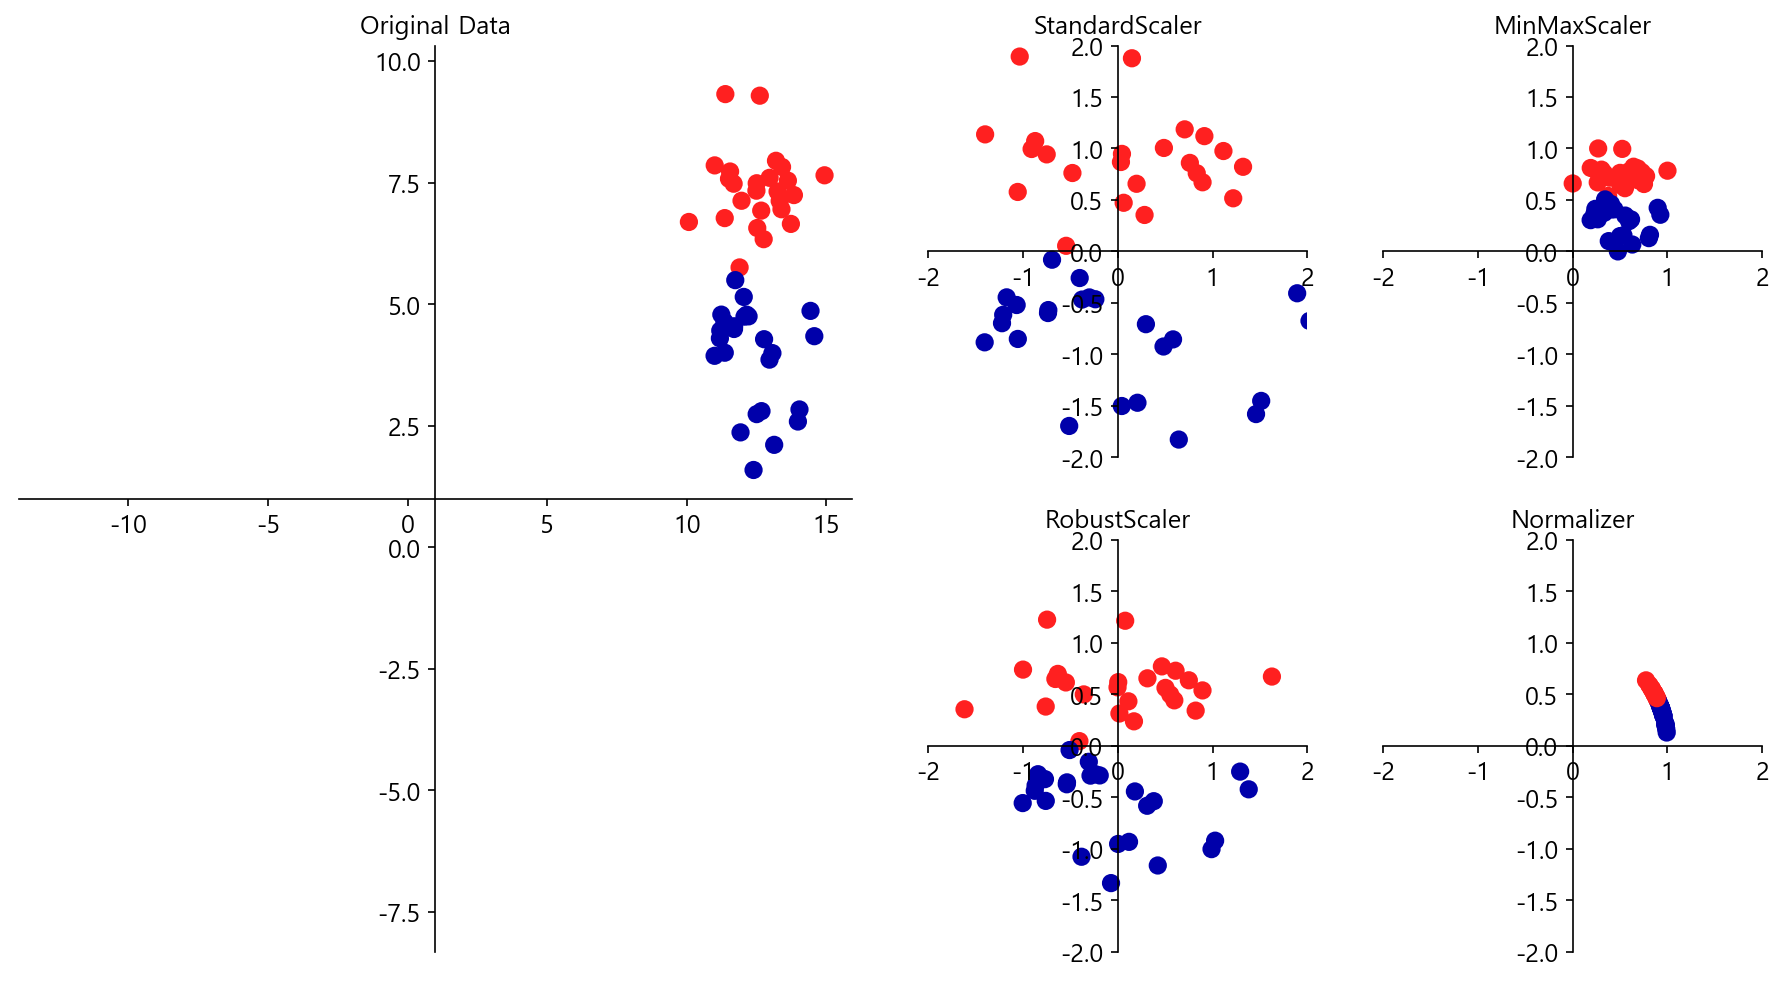

In [275]:
mglearn.plots.plot_scaling()

그림 3.1 데이터셋의 스케일을 조정하거나 전처리하는 여러가지 방법

#### 3.3.1  여러가지 전처리 방법
원본데이터는 인위적으로 만든 이진분류 데이터 셋이다. 첫번째 특성(x축)은 10~15사이에 있고, 두번째 특성(y축)은 1~사이에 있다.
오른쪽 그림은 데이터를 기준이 되는 범위로 변환하는 네가지 방법을 보여준다.

1. StandardScaler(scikit-learn): 각 속성을 평균을 0, 분산을 1로 변경. 그러나 각 속성의  특이값(outlier)의 크기가 다르므로 변환된 데이터의  최대/최소값의 크기가 다르게 나타난다.
2. MinMaxScaler: 모든 속성이 정확하게 0과 1사이에 위치하도록 데이터를 변경하므로 원래 속성의 특이값도 그대로 유지한다.

> StandardScaler, MinMaxScaler는 특이값에 매우 민감하다.

3. RobustScaler: 속성이 같은 스케일을 가지지만 평균과 분산대신 중간값<sup>median</sup>과 사분위값<sup>quartile</sup>을 사용하며, 이런 방식 때문에 전체 데이터와 이상치<sup>outlier</sup>에 거의 영향을 받지 않는다. 그러나 이상치를 분리하고자한다면 비선형 변환(PowerTransformer, QuantileTransformer)을 사용해야 한다.

> 데이터의 4분위 값 중 3분위-1분위의 차이값을 기준으로 각 데이터의 위치 결정

4. Normalizer: 매우 다른 스케일 조정기법으로 특성벡터의 유클리디안 길이가 1이 되도록 조정된다는 것이다. 각 샘플(row)마다의 L2 거리를 1로 조정한 후 각 속성의 거리를 계산한다.
그리고, 다른 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다. 따라서 개별 데이터에 대해 서로 다른 변환 계수(L2거리)가 적용된다. 정규화는 각 벡터 원소들의 상대적 크기만 중요한 경우에 사용된다.

> Normalizer는 다른 변환과는 다르게 속성에 대한 변환이 아니라 샘플당 변환이다.

[4가지 특성보기](http://benalexkeen.com/feature-scaling-with-scikit-learn/)

- MaxAbsScaler: 각 속성의 절대값이 0과 1사이에 위치하도록 변경하므로 MinMaxScaler와 비슷한 특성을 가진다.
- PowerTransformer: 각 속성의 데이터를 가우시안 분포처럼 만들기 위한 변환한다. 왜도(skewness)를 최소화하고 분산(variance)을 최적화하도록 scaling 요인을 조절한다.  Yeo-Johnson은 음수와 양수, Box-Cox는 반드시 양수에 적용한다. 기본적으로 평균은 0, 분산 규격화가 적용된다.
- QuantileTransformer: 

[기타 scikit-learn의 Scaler](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

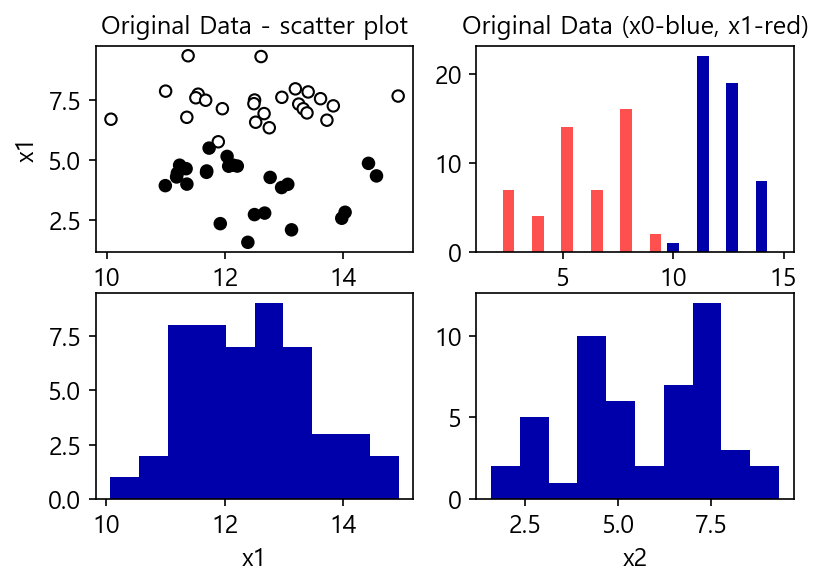

In [276]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

fig, axs = plt.subplots(2,2, figsize=(6,4))

axs[0,0].scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
axs[0,0].set_xlabel('x0')
axs[0,0].set_ylabel('x1')
axs[0,0].set_title("Original Data - scatter plot")
axs[0,1].hist(X)
axs[0,1].set_title("Original Data (x0-blue, x1-red)")
axs[1,0].hist(X[:,0])
axs[1,0].set_xlabel('x1')
axs[1,1].hist(X[:,1])
axs[1,1].set_xlabel('x2')
plt.show()

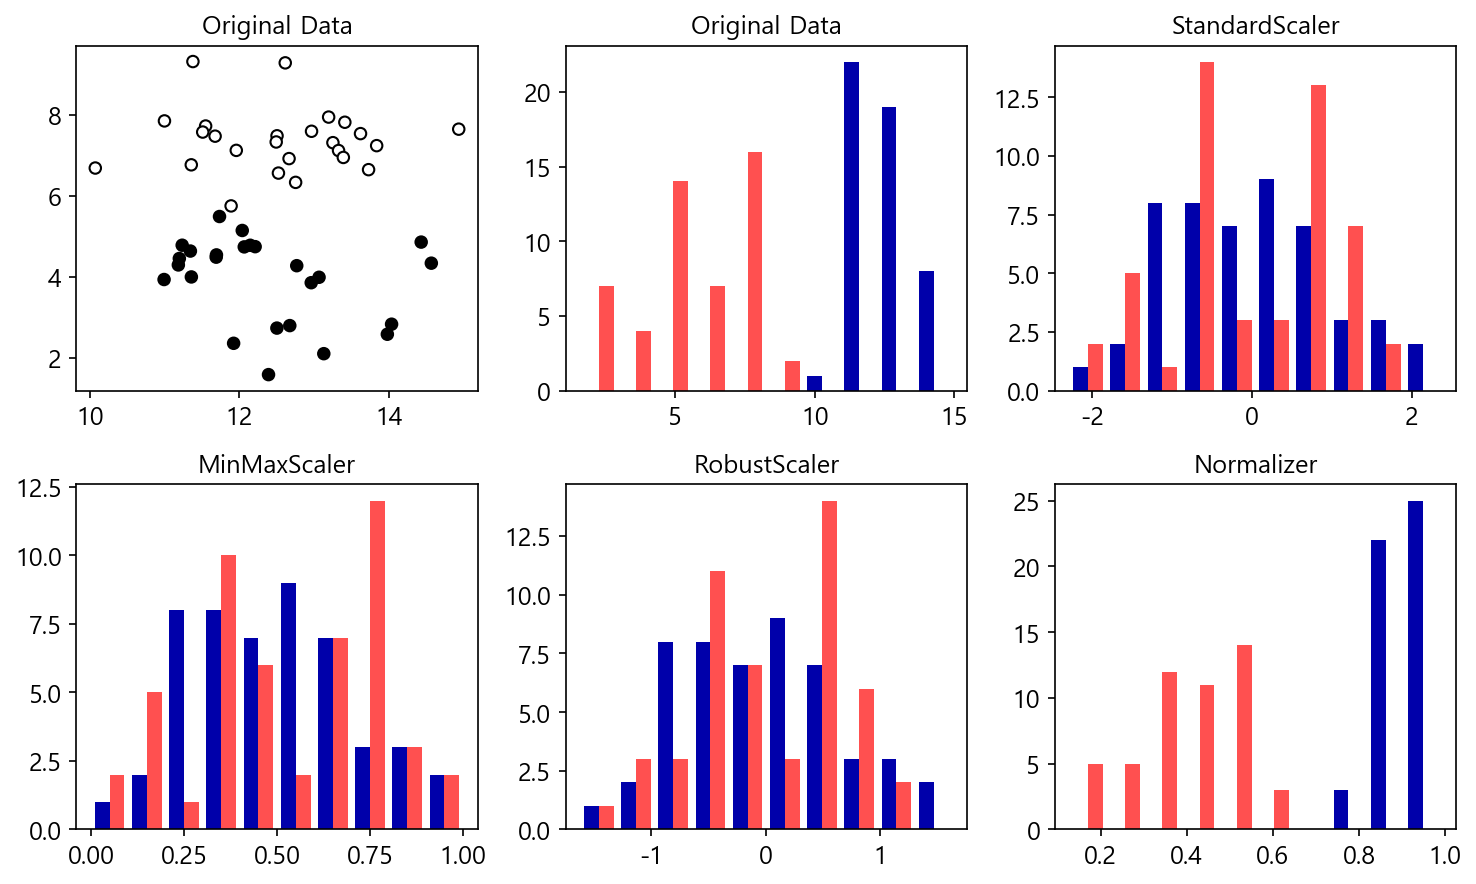

In [277]:
fig, axs = plt.subplots(2,3, figsize=(10,6))

axs[0,0].scatter(X[:, 0], X[:, 1],c=y, s=30,edgecolors='black')
axs[0,0].set_title("Original Data")

axs[0,1].hist(X)
axs[0,1].set_title('Original Data')

#StandardScaler
standard = StandardScaler().fit_transform(X)
axs[0,2].hist(standard)
axs[0,2].set_title('StandardScaler')

# MinMaxScaler
minmax = MinMaxScaler().fit_transform(X)
axs[1,0].hist(minmax)
axs[1,0].set_title('MinMaxScaler')

# RobustScaler
robust = RobustScaler().fit_transform(X)
axs[1,1].hist(robust)
axs[1,1].set_title('RobustScaler')

# Normalizer
normalize = Normalizer().fit_transform(X)
axs[1,2].hist(normalize)
axs[1,2].set_title('Normalizer')



Text(0.5, 1.0, 'P-Trans: yeo-johnson')

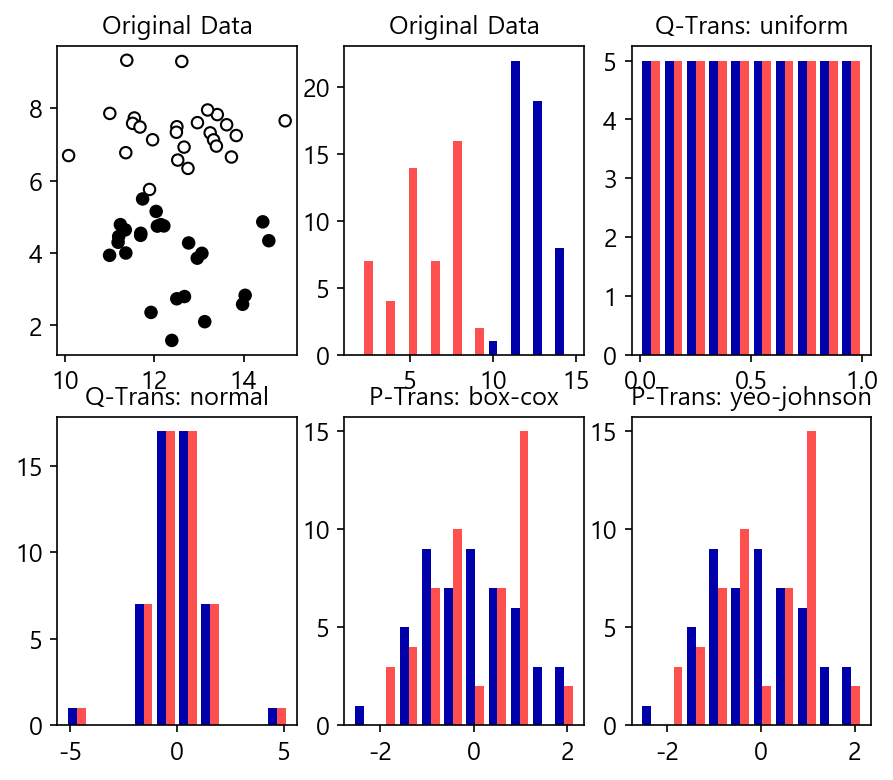

In [283]:
fig, axs = plt.subplots(2,3, figsize=(7,6))

axs[0,0].scatter(X[:, 0], X[:, 1],c=y, s=30,edgecolors='black')
axs[0,0].set_title("Original Data")

axs[0,1].hist(X)
axs[0,1].set_title('Original Data')

# QuantileTransform - uniform
Quantile_u = QuantileTransformer().fit_transform(X)
axs[0,2].hist(Quantile_u)
axs[0,2].set_title('Q-Trans: uniform')

# QuantileTransform - normal
Quantile_n = QuantileTransformer(output_distribution='normal').fit_transform(X)
axs[1,0].hist(Quantile_n)
axs[1,0].set_title('Q-Trans: normal')

# PowwerTransform -  box-cox(only positive number)
power_box = PowerTransformer(method='box-cox').fit_transform(X)
axs[1,1].hist(power_box)
axs[1,1].set_title('P-Trans: box-cox')

# PowwerTransform -  yeo-johnson(only positive number)
power_yeo = PowerTransformer(method='yeo-johnson').fit_transform(X)
axs[1,2].hist(power_yeo)
axs[1,2].set_title('P-Trans: yeo-johnson')


#### 3.3.2 데이터 변환 적용하기(Applying Data Transformations)

In [254]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [258]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [259]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981       9.71       43.79      143.5         0.05263     0.01938
   0.          0.          0.106       0.05024     0.1153      0.3602
   0.757       6.802       0.001713    0.002252    0.          0.
   0.009539    0.0008948   7.93       12.02       50.41      185.2
   0.07117     0.02729     0.          0.          0.1566      0.05521  ]
per-feature maximum before scaling:
 [  28.11      39.28     188.5     2501.         0.1634     0.2867
    0.4268     0.2012     0.304      0.09575    2.873      4.885
   21.98     542.2        0.03113    0.1354     0.396      0.05279
    0.06146    0.02984   36.04      49.54     251.2     4254.
    0.2226     0.9379     1.17       0.291      0.5774     0.1486 ]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [260]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031047  0.0226580994  0.0314421947  0.0114103924  0.1412837411
  0.0440670358  0.            0.            0.154040404  -0.006152494
 -0.0013779599  0.0059450141  0.0043066484  0.0007956698  0.0391950233
  0.0112205966  0.            0.           -0.0319138691  0.0066401338
  0.0266097474  0.0581023454  0.020319737   0.009437672   0.109423496
  0.0263779225  0.            0.           -0.0002376426 -0.0018203234]
per-feature maximum after scaling:
[0.9578777983 0.8150152181 0.9557736162 0.8935312831 0.8113207547
 1.2195870118 0.8795688847 0.9333996024 0.9323232323 1.0371346957
 0.4266961598 0.497657355  0.4411723131 0.283710436  0.4870313084
 0.738636705  0.7671717172 0.6292858496 1.3368579188 0.3905725302
 0.8961223764 0.7931769723 0.8485980378 0.7448879276 0.9154724955
 1.1318896125 1.0700854701 0.9237113402 1.2053231939 1.6306885105]


#### 3.3.3 훈련데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기(Scaling training and test data the same way)
지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.
다음 예는 테스트 세트 별도로 최소값과 범위를 사용했을 때 어떤일이 벌어지는지 보여준다.

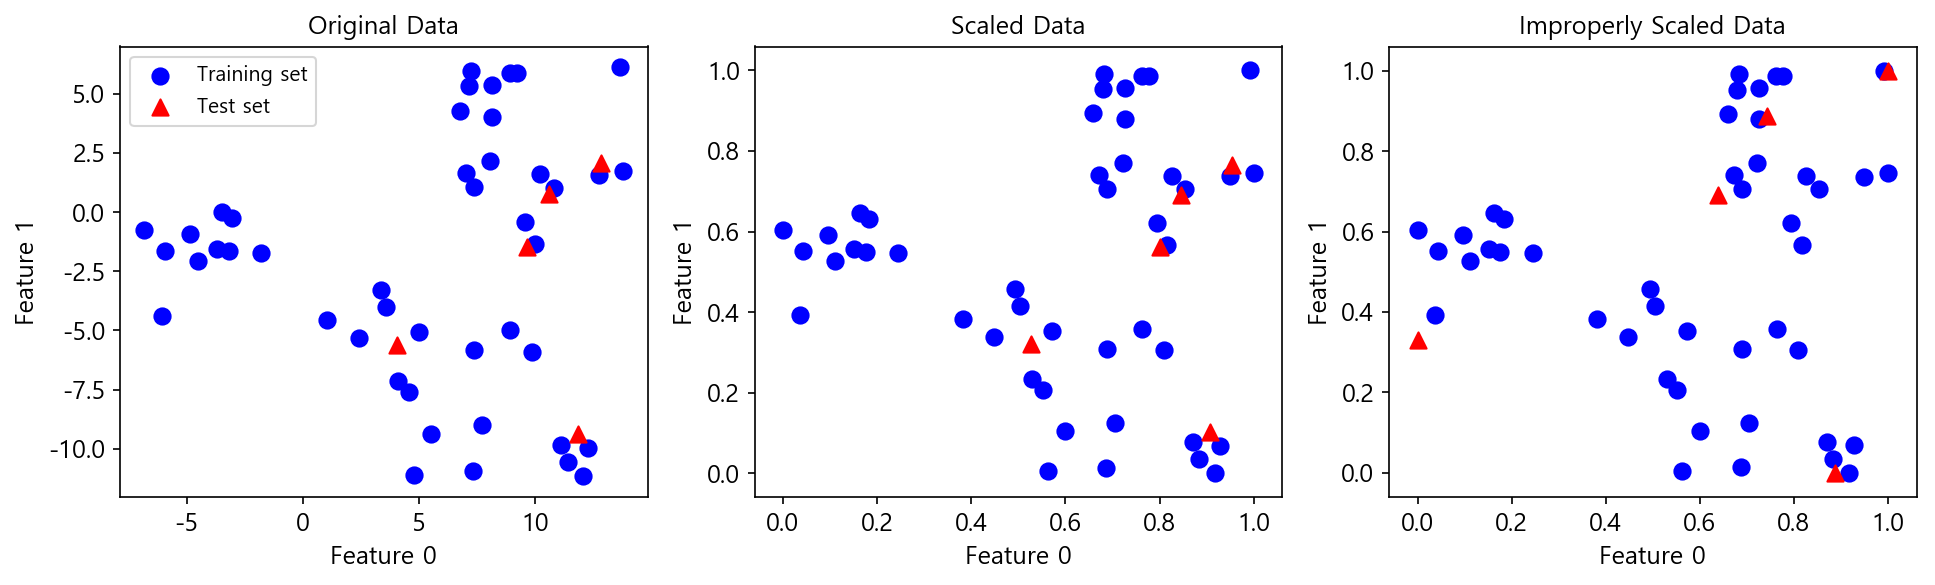

In [261]:
from sklearn.datasets import make_blobs
# make synthetic data
# 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c='r', label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c='r', label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c='r', label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

그림 3-2 훈련 데이터와 테스트 테이터의 스케일 조정을 함께 했을 때(가운데)와 따로 했을 때(오른쪽) 미치는 영향

 **_NOTE:_**  단축 메서드와 효율적인 방법

> 보통 어떤 데이터셋에 fit을 적용하면 transform을 호출한다. 이는 매우 전형적이 작업으로 fit과 transform을 차례로 호출하는 것보다 효율적인 방법이 필요하다. 이럴 때를 위해 transform 메소드를 가진모든 모델은 fit_transform 메소드를 제공한다.

즉, fit --> transform 으로 순차적 메소드 호출이 아니라 fit_transform 메소드를 호출해 효율적으로 사용하라.


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

#### 3.3.4 지도학습에서 데이터 전처리 효과
cancer 데이터셋으로 돌아가서 SVC를 학습시킬 때, MinMaxScaler의 효과를 확인해보자(2장에서 사용한 스케일 조정과 같음. P.136).


In [284]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
# SVC : kernel - default='rbf', 'poly',''sigmoid'
#       gamma - kernel coefficent 
svm = SVC(C=100, gamma='auto') # gamma ='auto'-default
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))
svm

Test set accuracy: 0.63


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [285]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [286]:
# 전체 데이터에 대한 Scale 조정한 경우
scaler_raw = MinMaxScaler()
scaler_raw.fit(cancer.data)

X_train_scaled = scaler_raw.transform(X_train)
X_test_scaled = scaler_raw.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))


Scaled test set accuracy: 0.97


In [289]:
Raw_scaled = scaler_raw.transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(Raw_scaled, cancer.target,
                                                    random_state=0)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


In [287]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


### 3.4 차원 축소, 특성 추출, 다면체(매니폴드) 학습
비지도학습에서 데이터를 변환해야 하는 이유는 여러 가지가 있다. 가장 일반적인 동기는 시각화하거나 데이터를 압축하거나 추가적인 처리(옮긴이-주로 지도학습에 사용)를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.

- 주성분 분석(PCA, principal component analysis)
- 특성 추출에 널리 사용하는 비음수 행렬 분해(NMF, non-negative matrix factorization)
- 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE(t-distributed stochastic neighbor embedding) 등의 알고리즘을 살펴보자.

#### 3.4.1 주성분 분석(PCA)
- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전(주성분축으로)시키는 기술이다.
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 특성 중 일부만 선택한다.
- 시각화(visualization)
- 잡음제거(noise reduction)




 **_NOTE:_**  **PCA 분석의 기본 가정**
 
 > 1. 데이터를 나타내는 하위매니폴드(submanifold)는 직선기반이다. 즉 달팽이 모양을 따라 움직이는 축(basis)은 취급하지 않는다. 그러나 3차원 공간에서 관측된 데이터가 구부러진 2차원 평면을 가지고 있다면 3차원을 고려해야 한다. 따라서 비선형 PCA도 있다([비선형 PCA](http://www.nlpca.org/)).(http://www.nlpca.org/)
 > 2. 큰 분산(variance)을 갖는 방향이 중요한 정보를 담고있다고 가정한다. 그러나 큰 분산을 갖는 반향이 정말로 중요한 방향인가?.
 > 3. 찾은 주축(principal component)들은 서로 직교(orthogonal)한다고 가정한다. 즉 첫번째 주축과 두번째 주축은 서로 직교한다. 그러나 직교하지 않을 수도 있다??.

아래 그림 설명

> PCA는 데이터의 분산(variance)을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아, 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법이다. 2차원 공간에 있는 데이터들이 하나의 주성분(PC1)을 새로운 기저로 선형변환된 걸 확인할 수 있습니다. 여기에서 핑크색 표시가 돼 있는 사선축이 원 데이터의 분산을 최대한 보존하는(=데이터가 가장 많이 흩뿌려져 있는) 새 기저입니다. PCA의 목적은 바로 이런 축을 찾는 데 있습니다.

<table><tr>
    <td>
    <img src="images/20190429_이미지_013.png" width="400"/></td>
    <td><img src="images/20190429_이미지_004.png" width="400" /></td>
    </tr>
</table>


![PCA](http://i.imgur.com/Uv2dlsH.gif)

다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타낸 것이다.



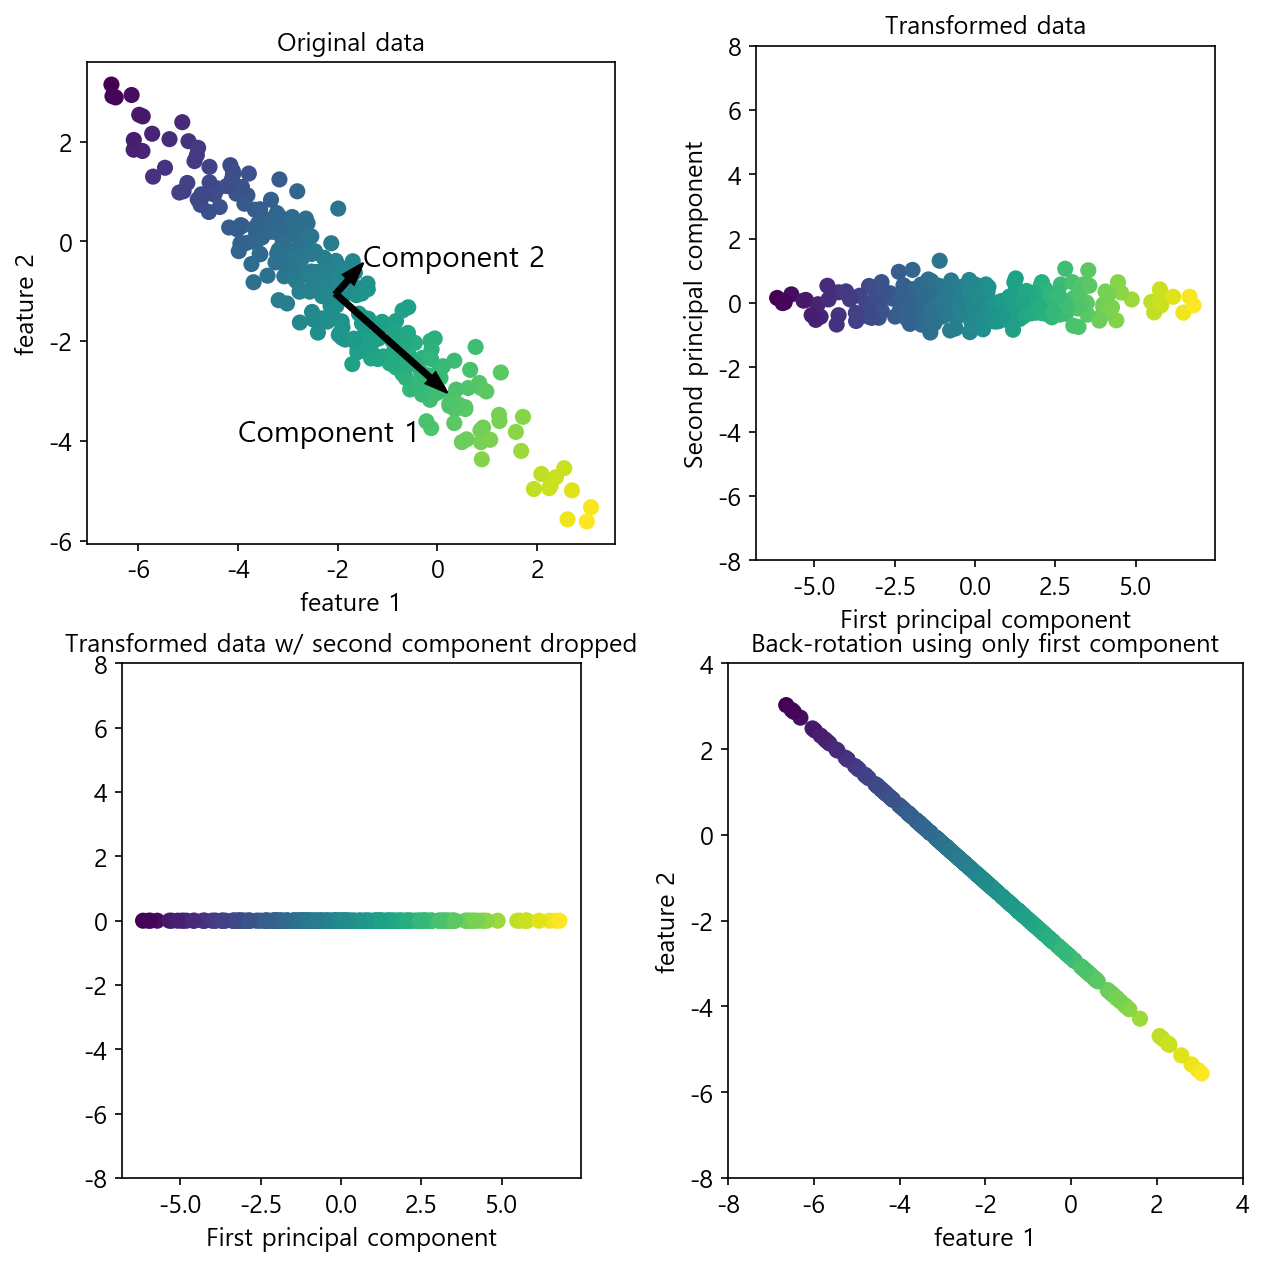

In [47]:
mglearn.plots.plot_pca_illustration()

그림 3.3 PCA를 이용한 데이터 변환

#### PCA를 적용해 유방암 데이터셋 시각화

- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화임
- 유방암 데이터셋은 30개의 특성(features)이므로 30개 중에서 2개(<sub>30</sub>C<sub>2</sub>=435)를 뽑아야 시각화할 수 있다.
- 이보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는 것이다. 

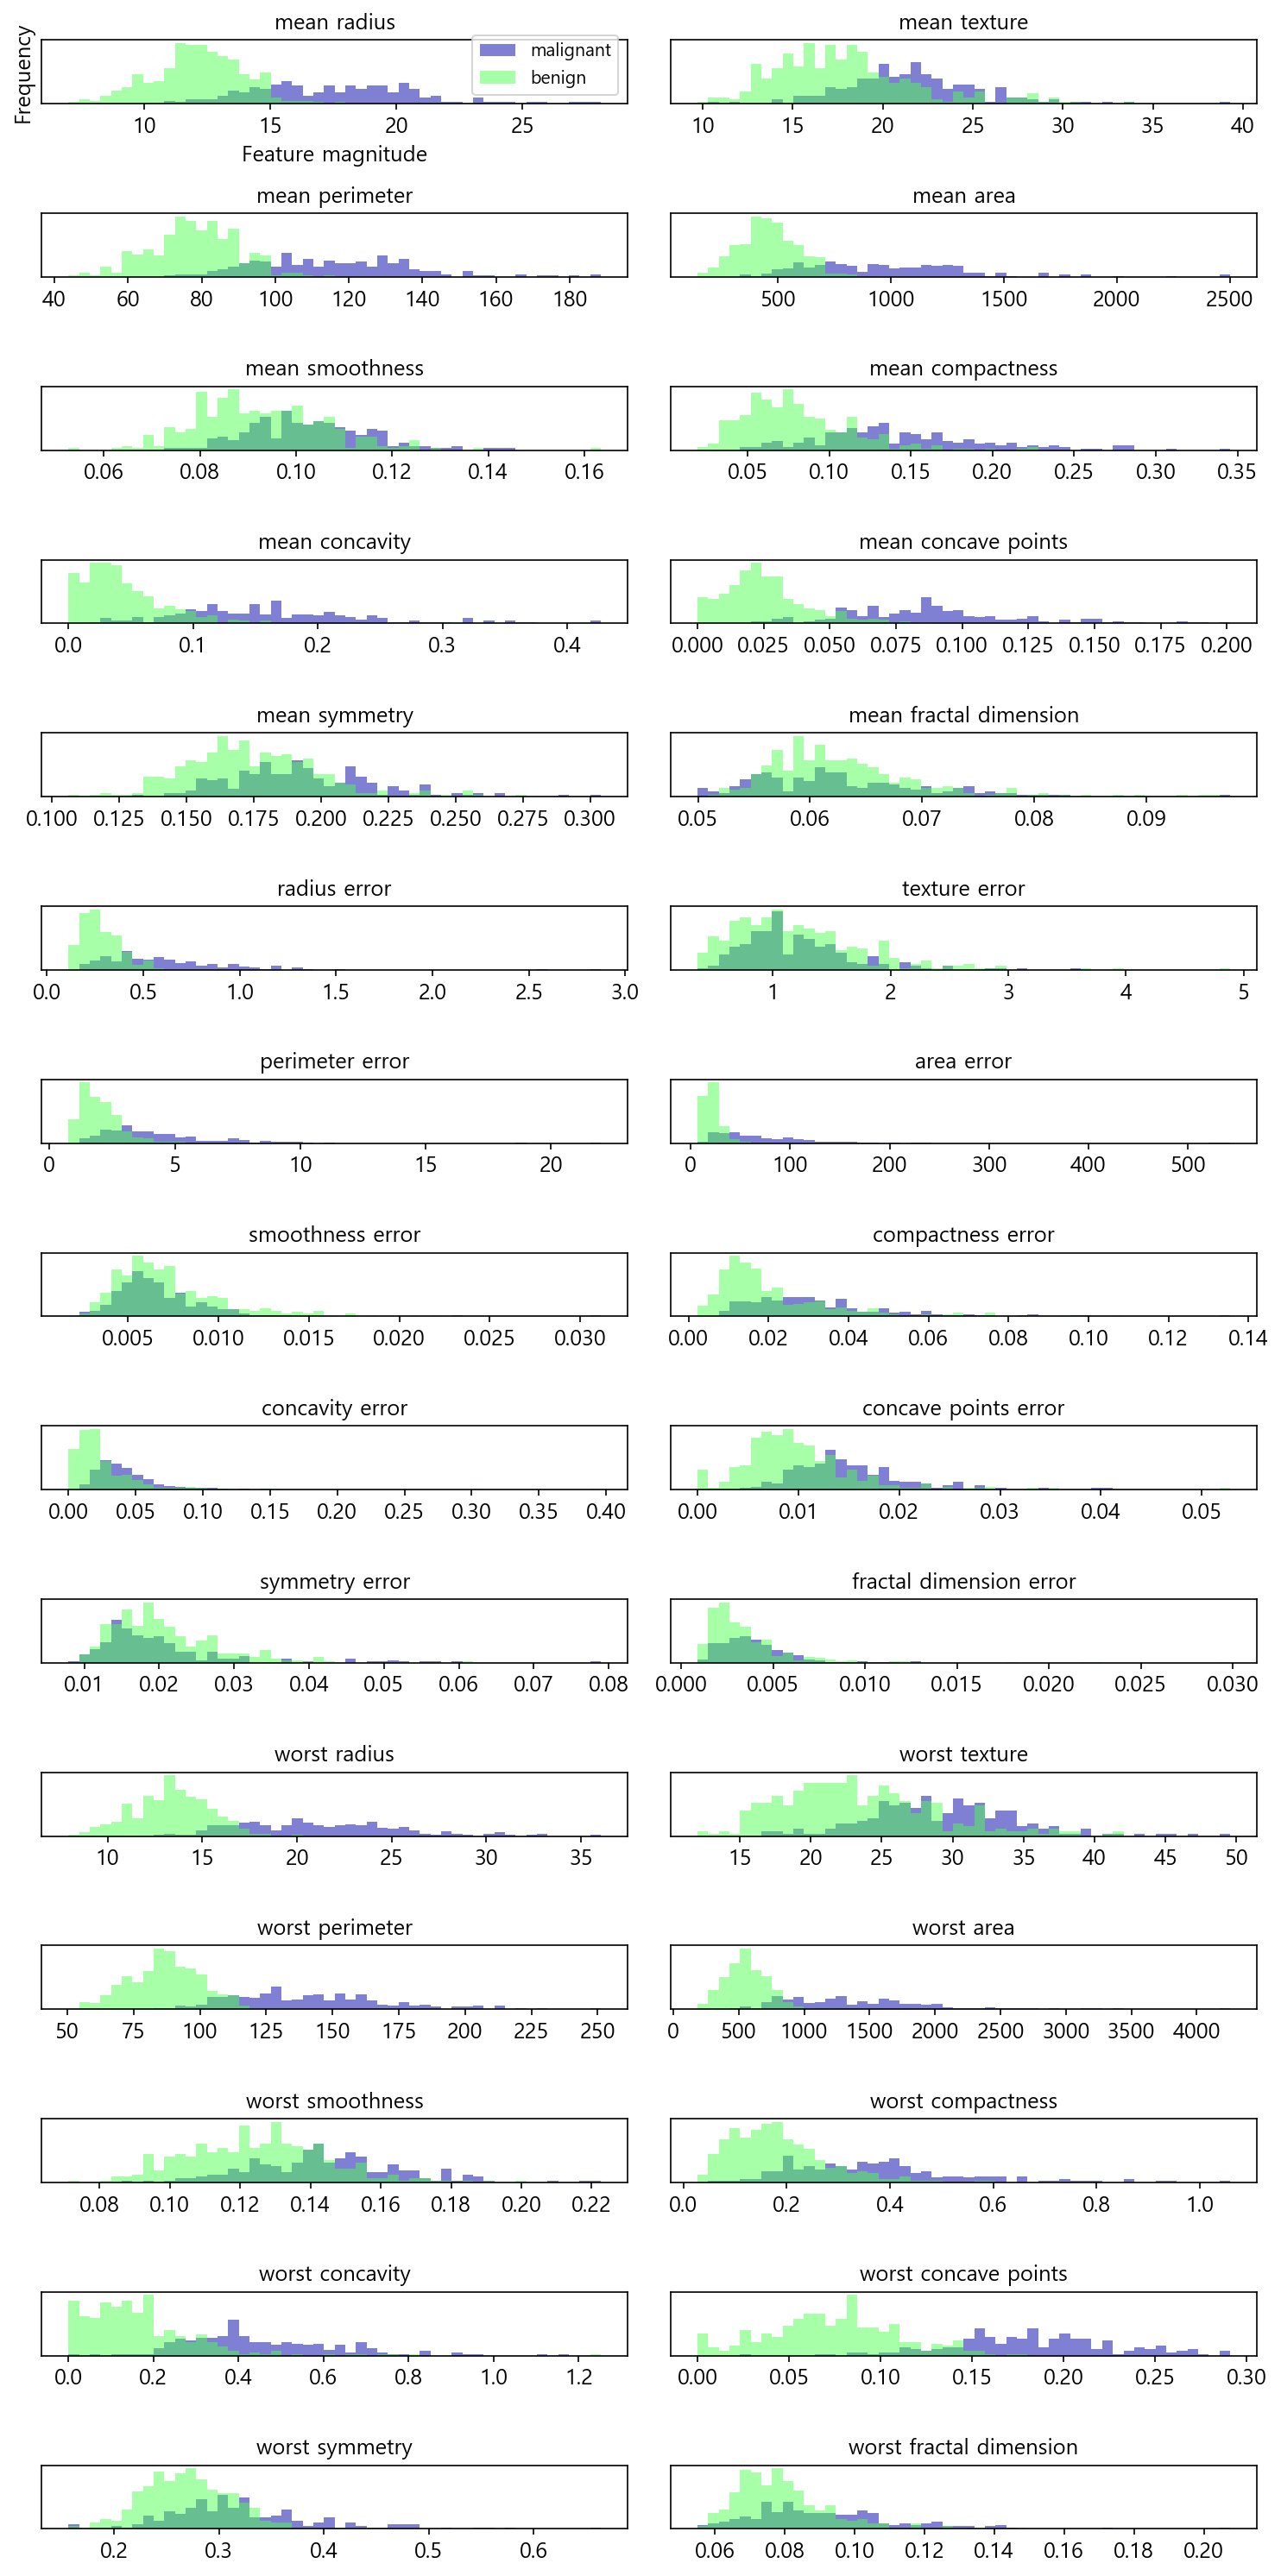

In [48]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

그림 3-4 유방암 데이터의 클래스별 히스토그램

- smoothness error은 히스토그램이 별로 쓸모가 없고
- worst concave points은 두 히스토그램이 확실히 구분되어 매우 유용한 특성

그러나, 이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 전혀 알려주지 못한다. PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들 수 있다.


PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터 스케일을 조정한다.

In [49]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

- PCA 변환을 학습하고 적용하는 것은 간단하다.
- PCA 객체를 생성하고, fit메소드로 주성분을 찾고 transform메소드를 호출해 데이터를 회전시키고 차원을 축소한다.
- PCA 적용시 기본값을 사용할 때, PCA는 데이터를 회전(그리고 이동)만 시키고 모든 주성분을 유지한다.따라서 PCA를 수행할 때 얼마나 많은 성분을 유지할 지 알려주어야 한다.

In [50]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


맨 처음 두개의 주성분을 사용해 그리자.

Text(0, 0.5, 'Second principal component')

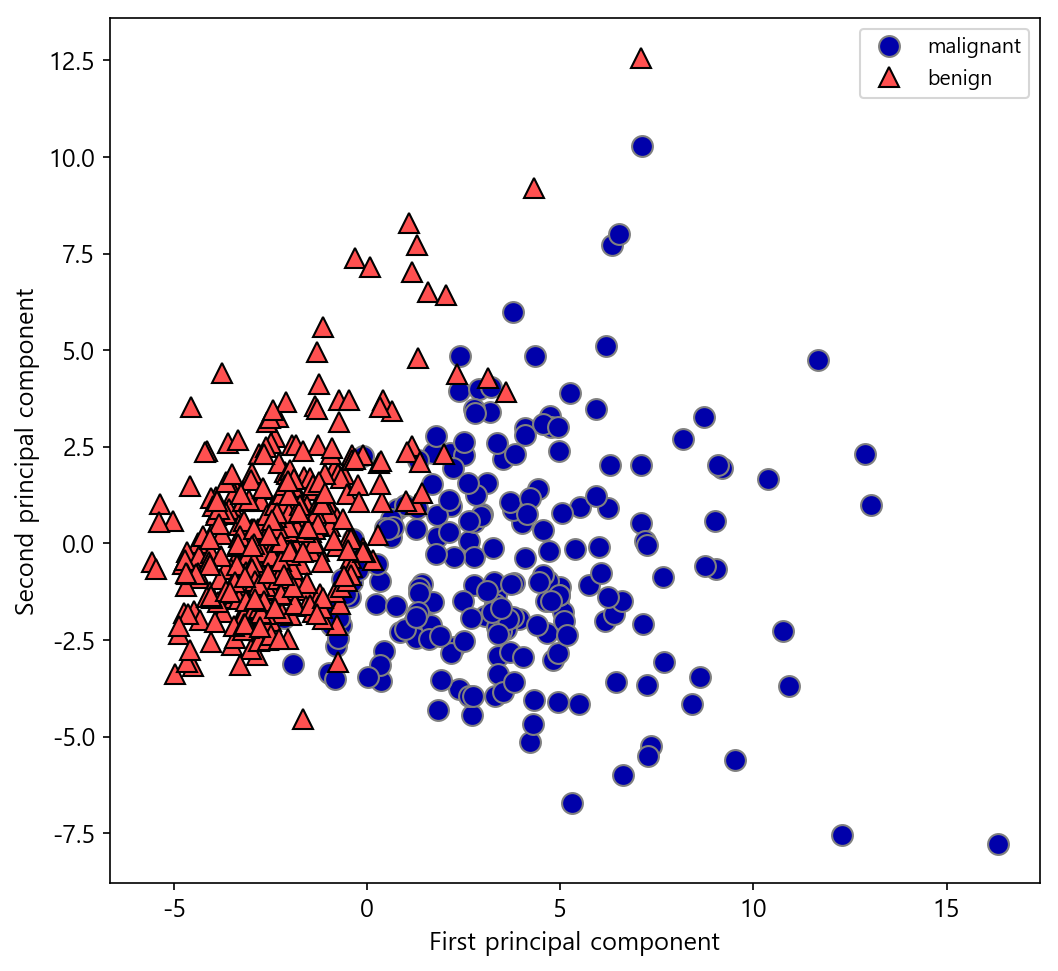

In [51]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

그림 3-5. 처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도


- 산점도는 2개의 주성분과 클래스 정보를 이용하여 그린 것이다.
- 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있다. --> 이정도면 2차원 공간에서 선형분류기로도 잘 구분할 수 있을  것임.


- **PCA의 단점은 두 축을 해석하기가 쉽지 않다는 점이다.**
- pca.components_ 속성에 주성분이 저장된다.

In [52]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


pca.components_의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있다. 열은 원본 데이터의 특성에 대응하는 값이다.

In [53]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


히트맵으로 시각화하여 보자.

Text(0, 0.5, 'Principal components')

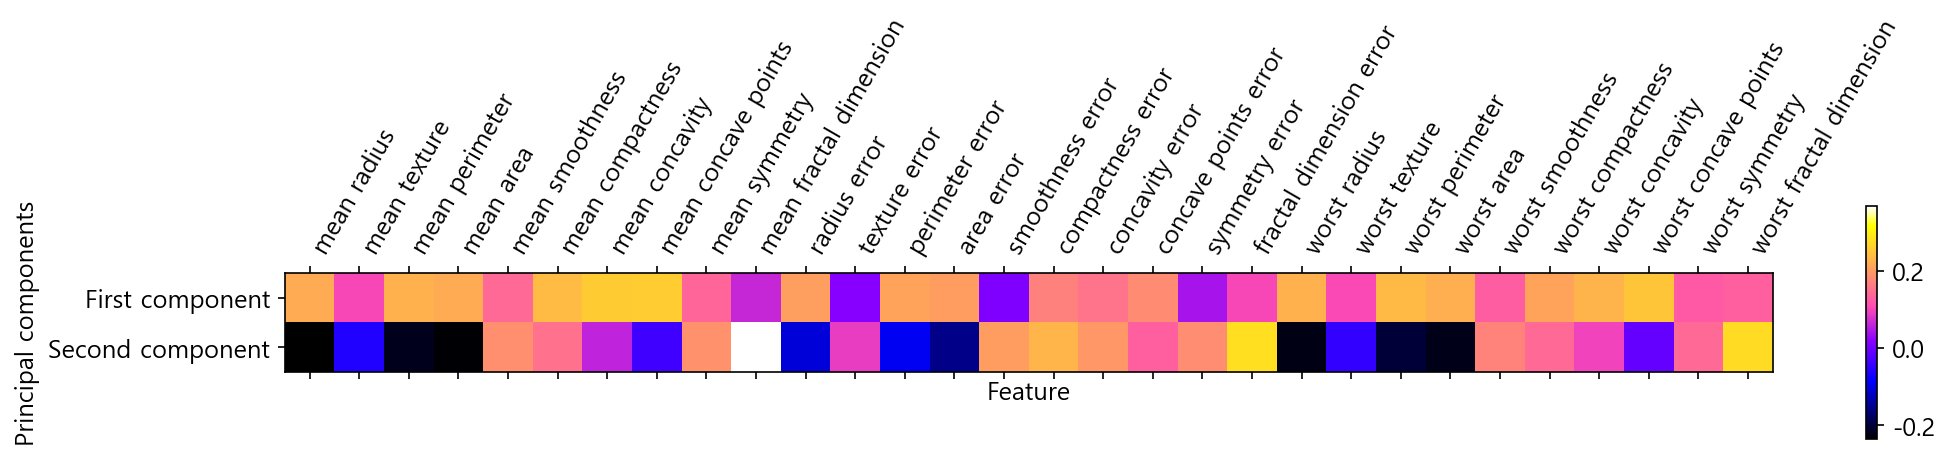

In [54]:
plt.matshow(pca.components_, cmap='gnuplot2')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- 첫번째 주성분의 모든 특성은 부호가 같은데 이는 모든 특성 사이에 공통의 상호작용이 있다는 뜻이다.


#### 고유얼굴(eigenface) 특성추출
- PCA는 특성 추출에도 용이하다.
- 특성 추출은 원본 데이터 표현보다 분석하기에 더 접합한 표현을 찾을 수 있으리란 생각에서 출발한다.
- 이미지는 특성 추출이 도움이 될만한 좋은 사례이다.


**PCA를 이용하여 LWF<sup>Labeled Faces in the Wild</sup>**데이터셋의 얼굴 이미지에서 특성 추출하는 간단한 예제를 살펴보자.
- 유명인사 얼굴 이미지로 2000년 초반의 정치인, 가수, 배우, 운동선수들의 얼굴
- 이미지 처리속도를 높이고자 흑백 이미지를 사용하였다.
- 62명의 얼굴을 찍은 이미지 3,023개이고 87x65픽셀이다.

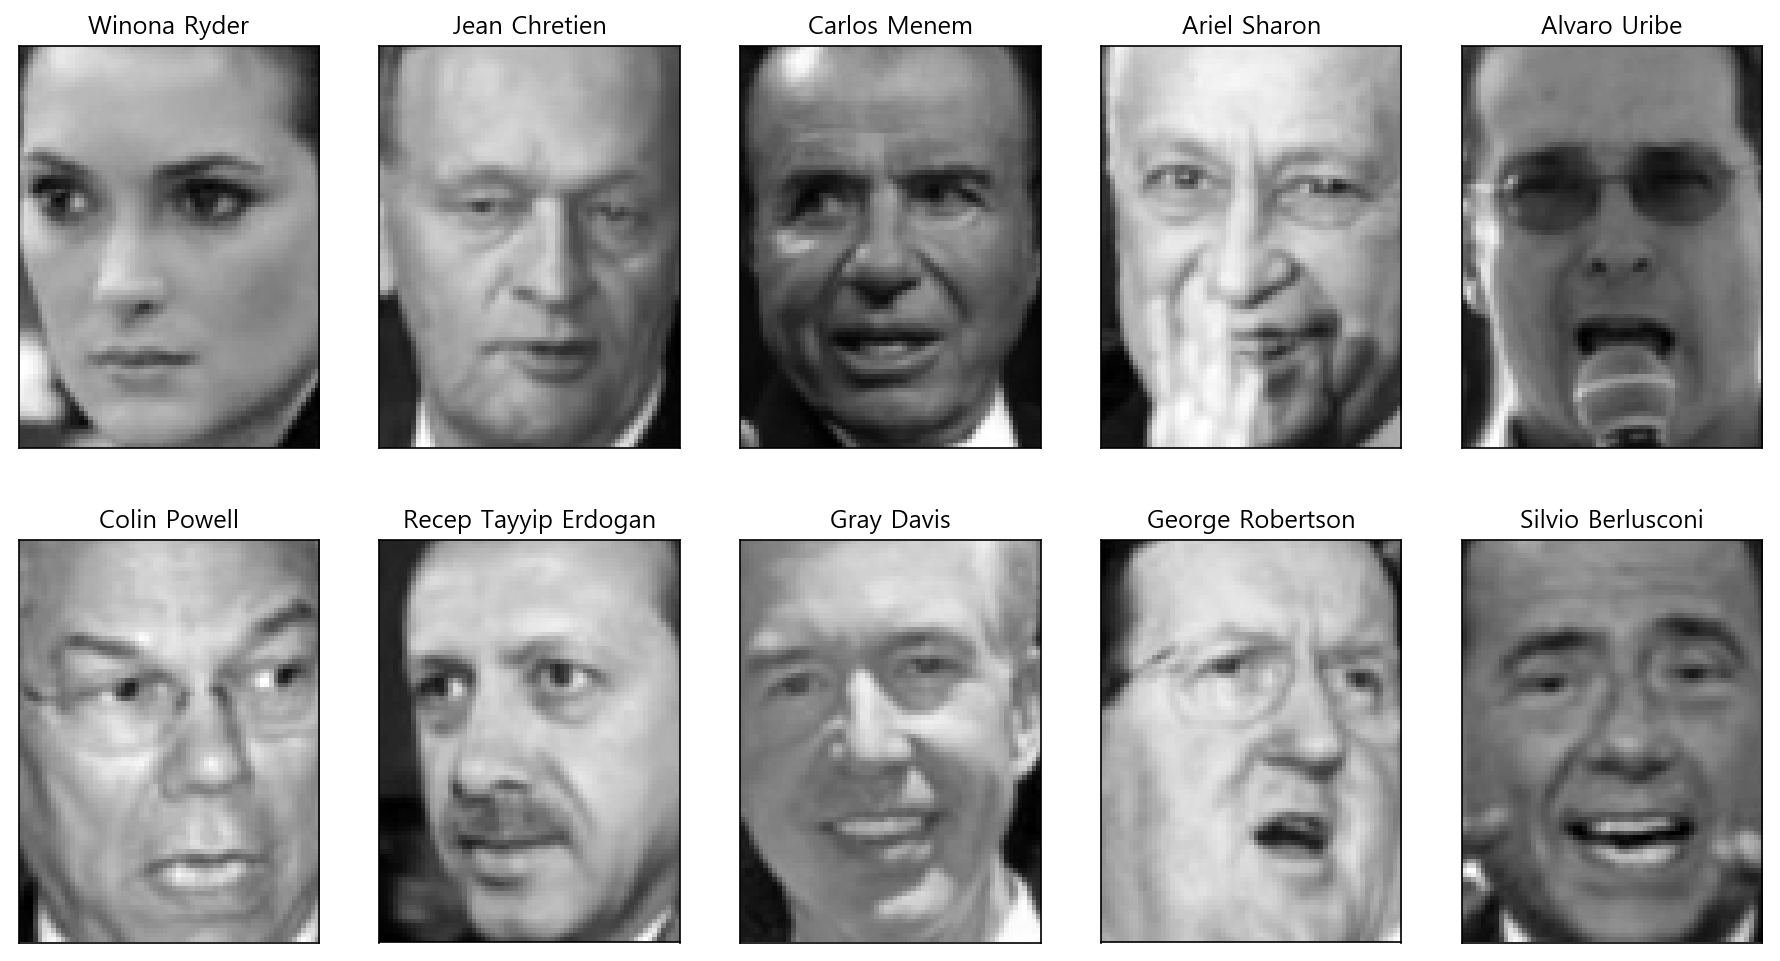

In [55]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [56]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [57]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

- 데이터셋이 조지 부쉬(530), 콜린파월(236)로 편중이 심하므로 사람마다 50개씩 만 선택하자.  
(만약 이렇게하지 않으면 **조지 부시** 이미지에 치우친 특성이 추출된다)

In [58]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
# (옮긴이: MinMaxScaler를 적용한 것과 거의 같음)
X_people = X_people / 255.

**얼굴인식**
- 통상적으로 새로운 이미지를 데이터베이스에서 기존 얼굴 중에서 하나를 찾는 작업이다.
- 그러나 보통 데이터베이스에 사람의 수는 많지만 각 사람에 대한 이미지는 적다.
- 이런 문제로 대부분의 분류기를 훈련시키기 어렵고 또 다시 훈련시키지 않고도 새로운 얼굴을 쉽게 추가할 수도 있어야 한다.
- 간단한 방법으로 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있다.

In [59]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


정확도가 23% 로 나쁘지않지만(무작위 추출의 정확도 1/62=1.6%) 그렇다고 좋은 결과도 아니다. 4번에 1번 꼴로 정확하게 인식한다. 

- 그래서 **PCA가 필요합니다.**
- 얼굴의 유사도를 보기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법이다. 이는 다른 이미지의 동일한 위치의 픽셀값을 비교하는 것이다. 
- 이는 사람이 이미지를 인식하는 방법과 많이 다르고 픽셀을 있는 그대로 비교하는 방식으로는 얼굴의 특징을 잡기 어렵다(이럴 경우 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 다른 얼굴로 인식할 수 도 있다).


- 여기서는 PCA의 화이트닝<sup>whitening, 백색화</sup> 옵션을 사용해서 주성분의 스케일이 같아지도록 조정(StandardScale을 적용한 것과 같음)한다.

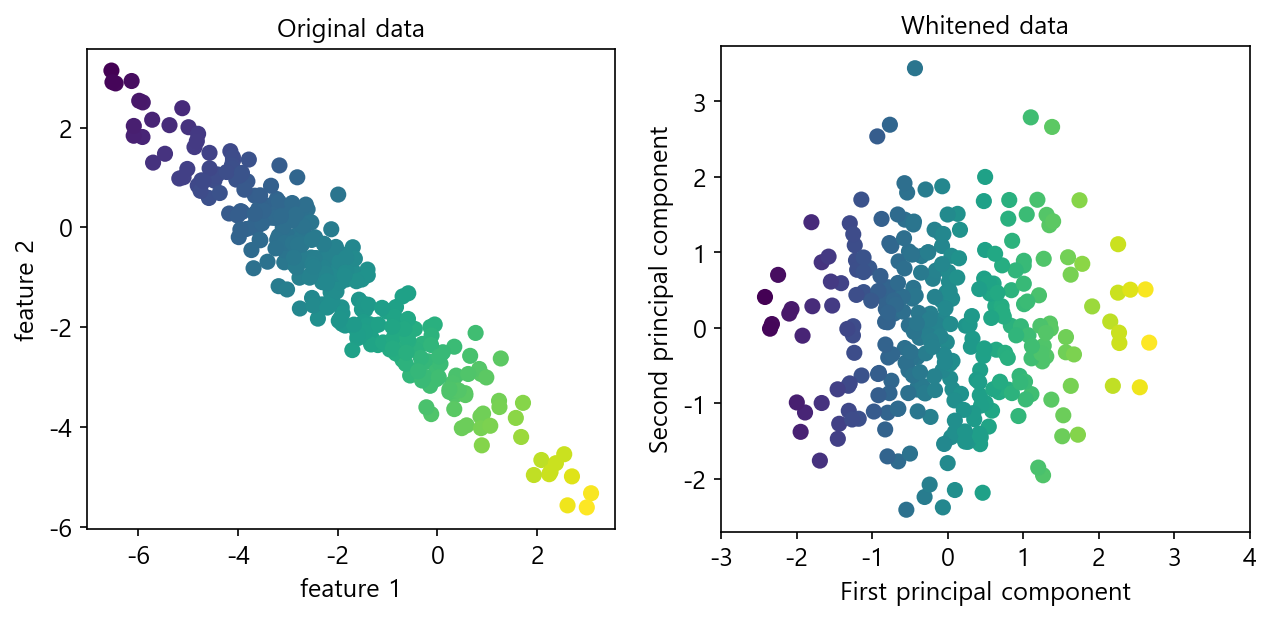

In [60]:
mglearn.plots.plot_pca_whitening()

그림 3-8 그림 3-3의 데이터에 화이트닝 옵션을 사용한 PCA 변환

- 화이트닝 옵션으로 데이터가 회전하는 것 뿐만 아니라 스케일도 조정되어 그래프가 원 모양으로 바뀌었다.

PCA객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출한다. 그리고 훈련데이터와 테스트 데이터를 변환한다.

In [61]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


이제 이 데이터를 사용해 1-최근접 이웃 분류기로 이미지를 분류해 보자.

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


모델의 정확도가 23%에서 31%로 향상되었고 주성분이 데이터를 더 잘 표현한다고 판단할 수 있다.

- 입력 데이터(이미지)는 87x65=5655개의 픽셀로 구성되어 있으며 각 픽셀은 0~1 사이의 회색톤 값을 가지고 있으며 이는 하나의 차원이다.
- PCA의 주성분의 특성 개수는 항상 입력 데이터의 차원과 같다.


In [63]:
# 100개의 주성분
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


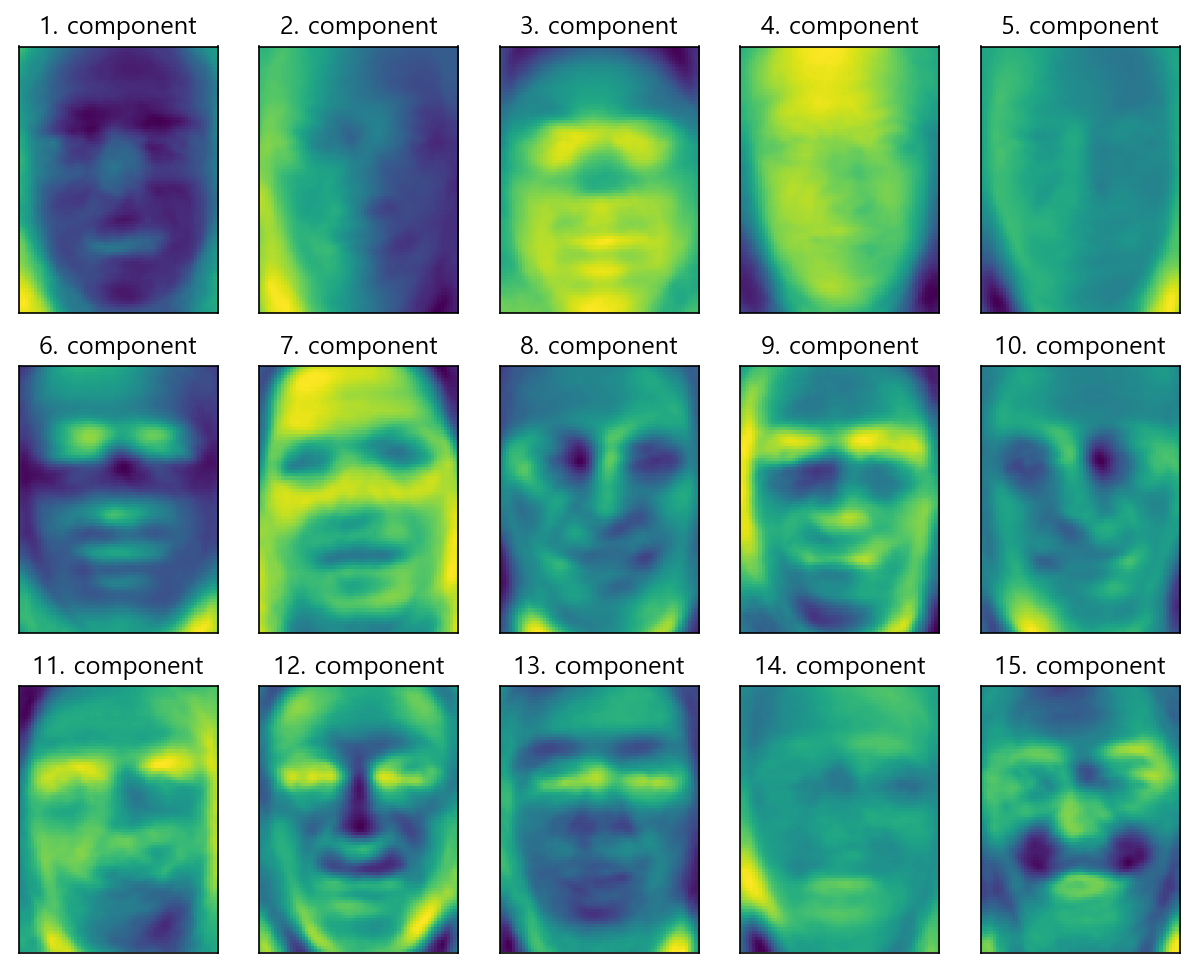

In [64]:
fig, axes = plt.subplots(3, 5, figsize=(10, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

- 첫번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이고
- 두번째 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것 같이 보인다.

- 이런 방식이 원본 픽셀 값을 사용하는 것보다 더 의미는 있지만 여전히 사람이 인식하는 방식과는 거리가 멀다. 
- 즉, PCA모델은 픽셀을 기반으로 하므로 얼굴의 배치와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰 영향을 준다. 알고리즘이 데이터를 해석하는 방식은 사람의 방식과는 상당히 다르다는 것을 기억해두어야 한다.



**어째든 PCA를 계속 사용해보자.**
- PCA를 해석하는 또 다른 좋은 방법은 테스트 포인트를 주성분의 가중치합으로 나타내는 데 필요한 수치(PCA 변환 뒤의 새로운 특성값)를 찾는 것으로 해석할 수 있다(그림 3-10).
- 그림 3-10은 X<sub>0</sub>과 X<sub>1</sub>은 이 데이터 포인터에 대한 주성분의 계수이다. 다른 말로 하면 이 이미지가 회전된 공간에 적용된 값이다.

![](images\image_pca.png)

그림 3-10 이미지를 주성분의 가중치 합으로 분해한 PCA 구성도

PCA를 이해하는 또 다른 방법은 몇 개의 주성분을 사용해 원본 데이터를 재구성해보는 것이다.
- 원래 특성 공간으로 되돌리는 작업은 inverse_transform 매소드를 사용한다.

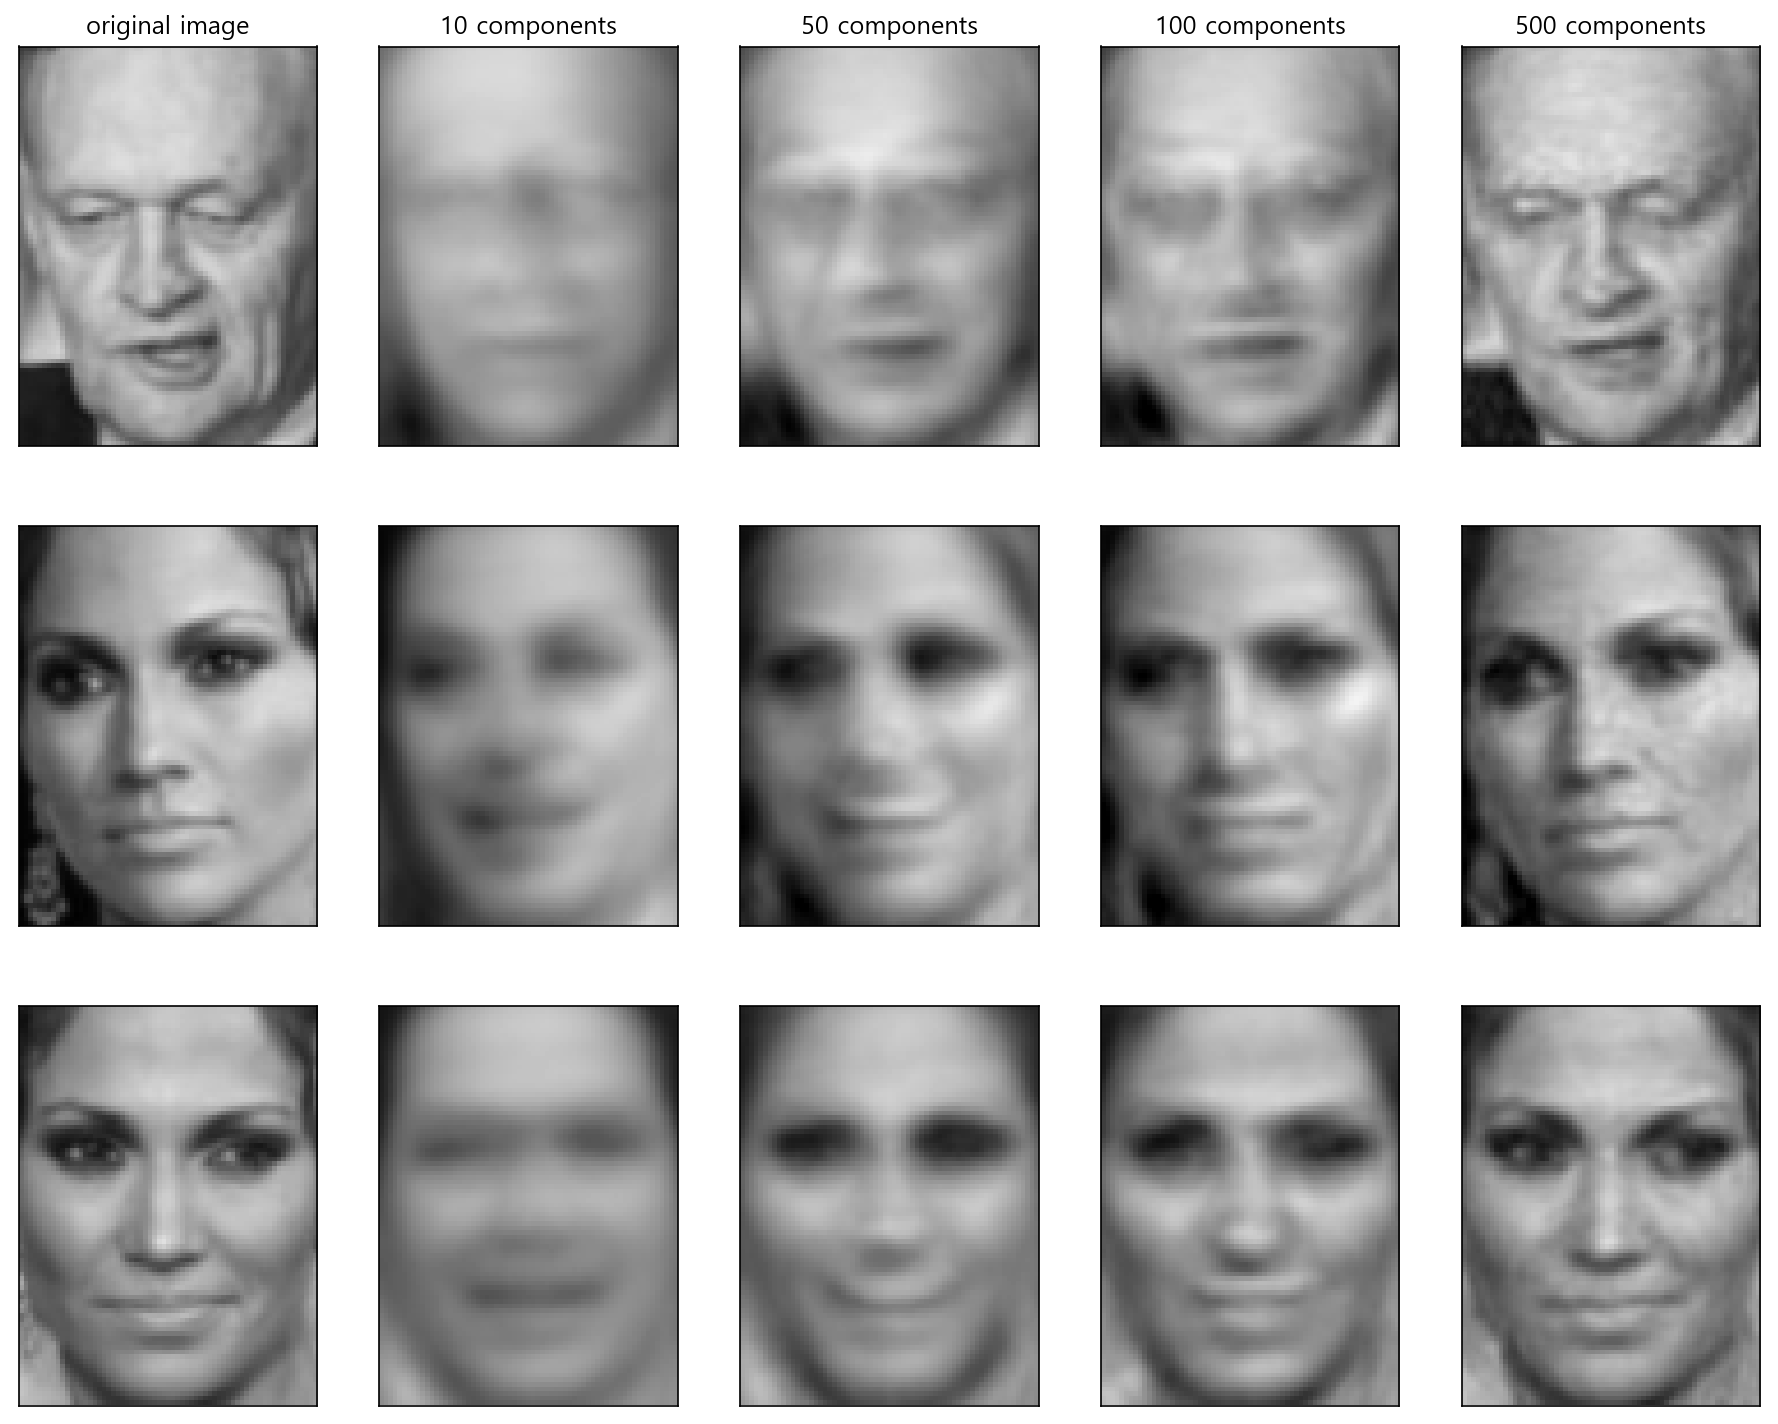

In [65]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

그림 3-11 주성분 개수에 따른 세 얼굴의 이미지 재구성

- 주성분 10개만 사용했을 때 얼굴의 각도, 조명 같은 이미지의 기본요소만 나타남
- 주성분이 많을 수록 이미지가 더욱 상세해진다.
- 주성분을 픽셀 수만큼 더하면 변환 후에 어떤 정보도 잃지 않게 되므로 이미지를 완벽하게 재구성할 수 있다.


cancer 데이터셋에서 한 것처럼 PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 쿨래스로 구분해 산점도로 나타낼 수 있다(그림 3-12).

Text(0, 0.5, 'Second principal component')

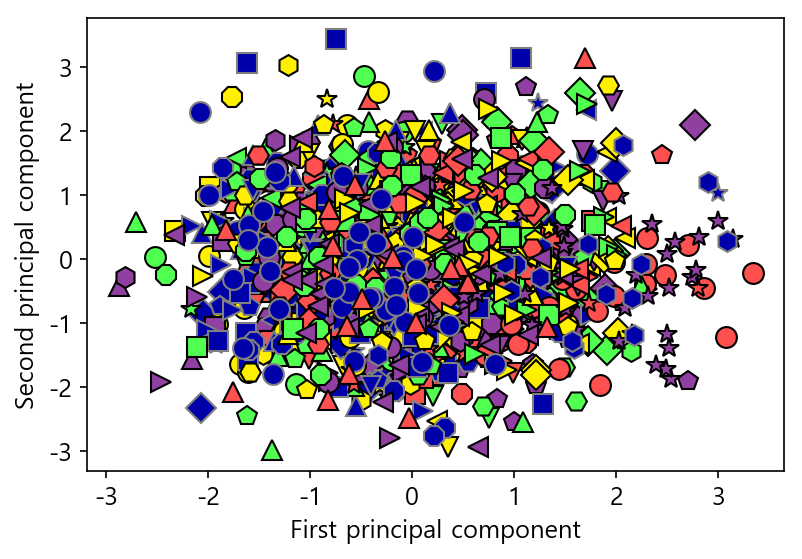

In [66]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

그림 3-12 처음 두 개의 주성분을 이용하여 만든 얼굴 데이터셋의 산점도(cancer 데이터셋에 대한 유사한 그래프는 [그림 3-5]참조)

주성분을 두 개만 사용했을 땐 전체 데이터가 한 덩어리로 뭉쳐 있어 클래스가 잘 구분되지 않는다. 그림 3-11에서 10개의 주성분을 사용했을 때도 PCA는 얼굴의 아주 대략적인 특징만 잡았기 때문에 이런 그래프가 당연해 보인다.

### 3.4.2 비음수 행렬 분해(NMF)
- NMF<sub>non-negative matrix factorization</sub>은 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘이다.
- PCA와 비슷하고 차원 축소에도 사용할 수 있음
- PCA에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았다면 NMF에서는 음수가 아닌 성분과 계수값을 찾는다. 즉, 주성분과 계수가 모두 0보다 크거나 같아야 한다.
- **음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.**


- 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 축가하여 만들어진 데이터에 유용
- 이럴 때 NMF는 섞여 있는 데이터에서 원본 성분을 구할 수 있다.
- 음수로된 성분이나 계수가 만드는 상쇄 효과를 이해하기가 어려운 PCA보다 대체로 NMF의 주성분이 해석하기 쉽다. 예를 들어 고유얼굴은 양수와 음수값을 모두 가지고 있지만, PCA를 설명할 때 언급했듯이 이 부호는 실제 아무 규칙이 없다. 이 얼굴 데이터셋에 NMF를 적용하기 전에 인위적인 데이터셋으로 만든 예를 잠시 살펴보자.


### 인위적 데이터에 NMF 사용하기
- 우선 데이터가 양수인지 확인해야 한다.
- 이 말은 데이터가 원점 (0, 0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻이다.
- 그렇기 때문에 원점 (0, 0)에서 데이터로 가는 방향을 추출한 것으로 음수 미포함 성분을 이해할 수 있다.

다음 예는 2차원 예제 데이터에 NMF를 적용한 겨과를 보여준다(그림 3-13).

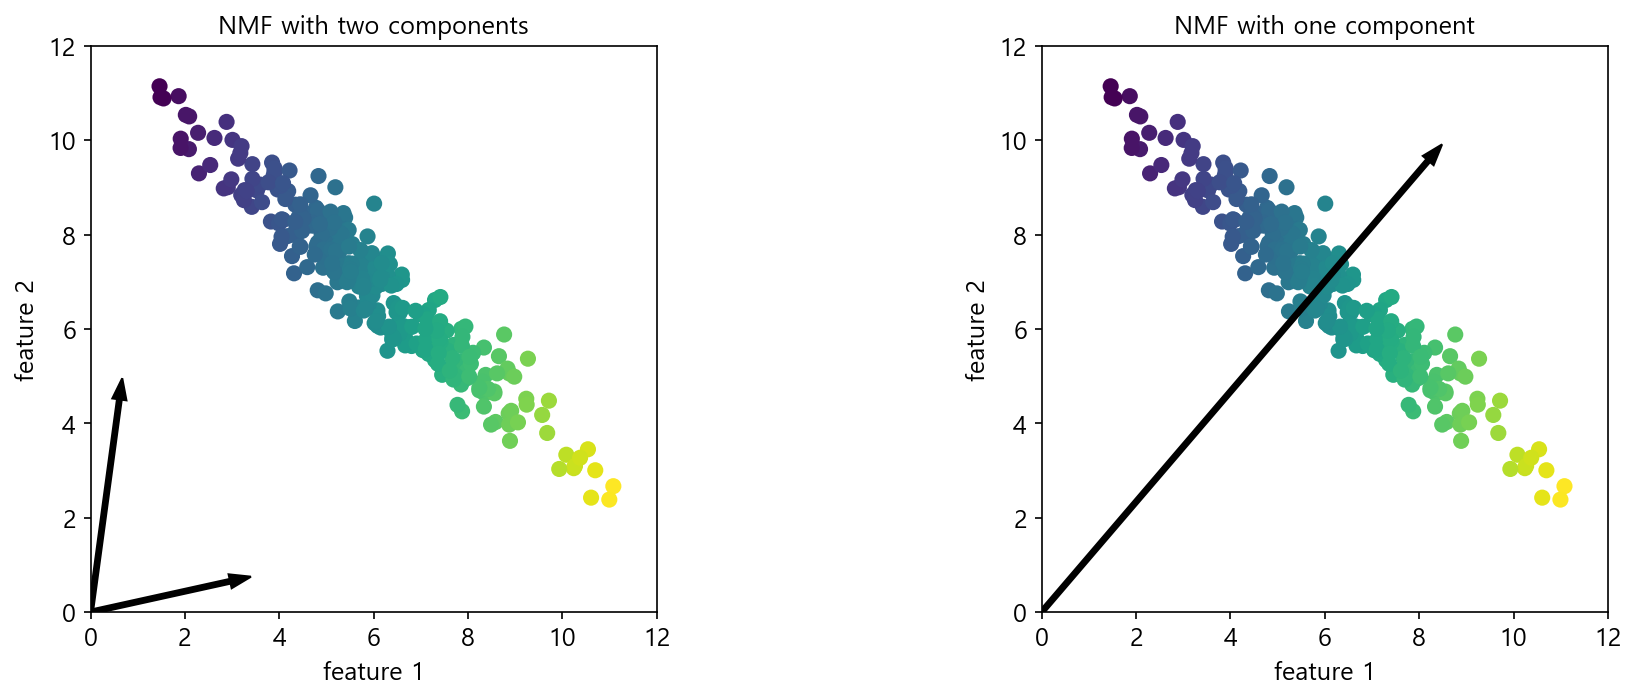

In [67]:
mglearn.plots.plot_nmf_illustration()

그림 3-13 NMF로 찾은 성분이 2개일 때(왼쪽)와 1개일 때(오른쪽)

